realizado por:

Alfredo Lopez Aguirre 1992104

Maria Magdely Presas Huerta 1921175

Daniela Priscila Delgadillo Esquivel 1909350

Notebook 2

Utilizamos el dataset mnist para entrenar una red neuronal convolucional y utilizamos un dataset generado por nosotros para validarla.

Primero importamos todas las librerias que se van a utilizar:

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.datasets import mnist
from matplotlib import pyplot
import cv2
import glob
import numpy as np

Al igual que en el Notebook 1, se declararon los arreglos vacios para guardar las imagenes, las etiquetas y las imagenes reescaladas que servirán para validar la RN. Se utilizaron las mismas lineas de código que en Notebook 1.


In [ ]:
img_array=[]
label_array=[]
img_resized=[]

In [ ]:
array0=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/numeros/0/0*")]
label0=["0" for file in array0]
array1=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/numeros/1/1*")]
label1=["1" for file in array1]
array2=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/numeros/2/2*")]
label2=["2" for file in array2]
array3=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/numeros/3/3*")]
label3=["3" for file in array3]
array4=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/numeros/4/4*")]
label4=["4" for file in array4]
array5=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/numeros/5/5*")]
label5=["5" for file in array5]
array6=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/numeros/6/6*")]
label6=["6" for file in array6]
array7=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/numeros/7/7*")]
label7=["7" for file in array7]
array8=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/numeros/8/8*")]
label8=["8" for file in array8]
array9=[cv2.imread(file,cv2.IMREAD_GRAYSCALE)for file in glob.glob("/content/sample_data/numeros/9/9*")]
label9=["9" for file in array9]
img_array=array0+array1+array2+array3+array4+array5+array6+array7+array8+array9
print(len(img_array))
label_array=label0+label1+label2+label3+label4+label5+label6+label7+label8+label9
print(len(label_array))

300
300


Se utiliza el mismo algoritmo que en el Notebook 1 para reescalar las imagenes a 28,28. 

In [ ]:
#resize
test_images=[]
img_resized=[cv2.resize(file, (28,28), interpolation=cv2.INTER_LINEAR)for file in img_array]
len(img_resized)

300

Se convirtieron los arreglos a arreglos de numpy y se usó labelEncoder para las etiquetas y que el programa pudiera leer los datos.

In [ ]:
#convertir a float
test_images=np.array(img_resized)
test_labels=np.array(label_array)

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
test_labels=label.fit_transform(label_array)

Se normalizaron las imagenes y posteriormente se usó el comando .shape y len para verificar que se contara con las caracteristicas deseadas.

In [ ]:
test_images=test_images/255.0

In [ ]:
print(test_images.shape)
print(len(test_labels))

(300, 28, 28)
300


AxesImage(54,36;334.8x217.44)
Text(0.5, 0, '0')


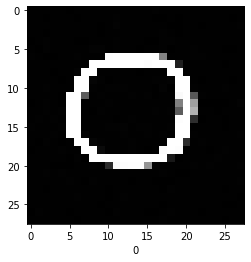

In [ ]:
print(plt.imshow(test_images[20],cmap='gray'))
print(plt.xlabel(test_labels[20]))

Se cargaron el dataset de mnist al programa y posteriormente se imprimieron los arreglos que se utilizarian para entrenar a la red neuronal.

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
train_X=train_X/255.0
test_X=test_X/255.0

Se utilizó el mismo algoritmo que en el Notebook 1 para visualizar las imagenes y corroborar que se importaran de manera correcta.

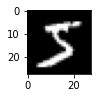

None


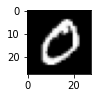

None


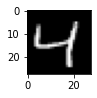

None


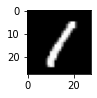

None


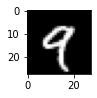

None


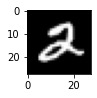

None


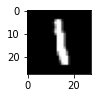

None


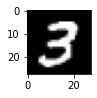

None


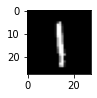

None


In [ ]:
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  print(pyplot.show())

Estructura y entrenamiento de Red Neuronal Artificial Convolusional (RNAC)


En esta sección se establece la cantidad de capas de convolusión y capas de aprendizaje para nuestra red neuronal artificial convolusional.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=10, 
                    validation_data=(test_X, test_y))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 65s 34ms/step - loss: 0.1464 - accuracy: 0.9554 - val_loss: 0.0452 - val_accuracy: 0.9840
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0379 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0410 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0267 - accuracy: 0.9912 - val_loss: 0.0404 - val_accuracy: 0.9876
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.0295 - val_accuracy: 0.9909
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0179 - accuracy: 0.9945 - val_loss: 0.0325 - val_accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0309 - val_accura

Resultado de exactitud de la RNAC

en la grafica podemos apreciar el como cambia conforme avanzan las epocas de entrenamiento la presicion del programa tanto la presicion de su validacion, esto determina el porcentaje de precicion de el programa

10/10 - 0s - loss: 1.1822 - accuracy: 0.8000 - 196ms/epoch - 20ms/step
0.800000011920929


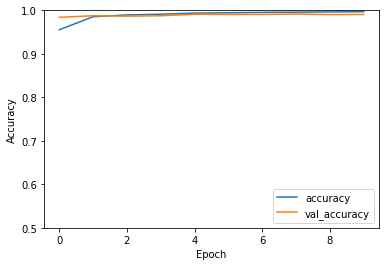

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)


Se muestran al menos 3 predicciones de dígitos del 0 al 9. apreciamos que el programa acerto el 100% de las predicciones realizadas. Con esto concluimos que nuestro programa esta bien entrenado para reconocer la escritura de los numeros.

In [ ]:
#predicciones
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[9.9964941e-01 6.6326718e-12 6.8595233e-05 2.0625897e-09 4.4509685e-09
 6.1290403e-11 6.4540757e-08 6.8033408e-08 2.4754124e-07 2.8153398e-04]
0
0


In [ ]:
print(predictions[50])
print(np.argmax(predictions[50]))
print(test_labels[50])

[1.6250082e-12 9.9999762e-01 1.9038392e-06 4.7156885e-08 6.3990186e-09
 1.2649050e-10 2.2768330e-12 4.7069432e-07 3.1627678e-10 9.3126472e-13]
1
1


In [ ]:
print(predictions[120])
print(np.argmax(predictions[120]))
print(test_labels[120])

[4.0952535e-14 1.3757899e-09 3.1995270e-13 5.6823015e-11 1.0000000e+00
 2.5969305e-08 5.7397441e-13 9.9289587e-12 3.8208509e-15 5.8698468e-08]
4
4
